## Stock Price Prediction

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

In [4]:
df = web.DataReader('NFLX', data_source='yahoo', start='2016/01/01', end='2021/01/01')
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000,513.969971
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900,519.119995
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400,530.869995
2020-12-30,533.260010,523.690002,530.130005,524.590027,1876300,524.590027
2020-12-31,545.500000,523.150024,525.530029,540.729980,5388800,540.729980


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,276.694365,267.973897,272.421754,272.539659,9.136159e+06,272.539659
std,132.567021,127.906767,130.287528,130.367048,6.091893e+06,130.367048
min,84.699997,79.949997,80.570000,82.790001,1.144000e+06,82.790001
25%,145.685005,143.252495,144.444996,144.119999,5.289100e+06,144.119999
50%,296.860001,287.480011,292.345001,291.565002,7.328750e+06,291.565002
75%,368.194992,357.457504,362.985008,362.779999,1.098395e+07,362.779999
max,575.369995,541.000000,567.979980,556.549988,5.841040e+07,556.549988


In [6]:
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999245,0.999420,0.999421,-0.189090,0.999421
Low,0.999245,1.000000,0.999395,0.999382,-0.208602,0.999382
Open,0.999420,0.999395,1.000000,0.998693,-0.198388,0.998693
Close,0.999421,0.999382,0.998693,1.000000,-0.197622,1.000000
Volume,-0.189090,-0.208602,-0.198388,-0.197622,1.000000,-0.197622
Adj Close,0.999421,0.999382,0.998693,1.000000,-0.197622,1.000000


C:\Users\Afrid\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:>

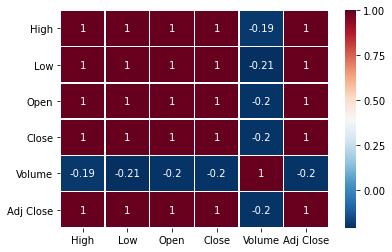

In [7]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

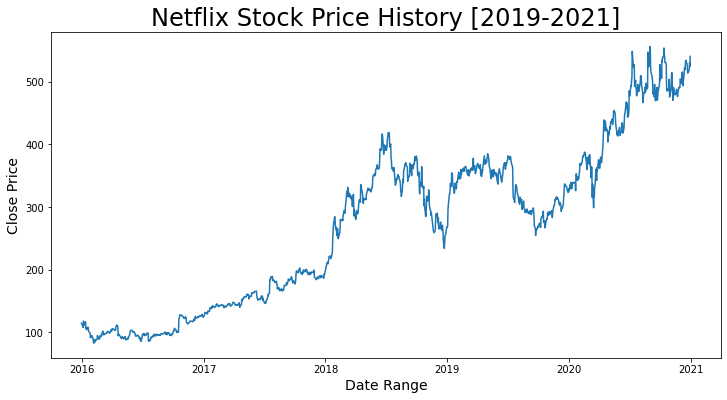

In [8]:
plt.figure(figsize=(12,6))
plt.title('Netflix Stock Price History [2019-2021]', fontsize=24)
plt.plot(df.index, df['Close'])
plt.xlabel('Date Range', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.style.use('bmh')
# ['bmh', 'dark_background', 'ggplot', 'fivethirtyeight', 'grayscale']
plt.show()

In [9]:
#### Preparing dataset for Model Training ####
## DateTime fromat will give error in model training 
df.reset_index(inplace=True)
nflx_df = df[['Date', 'High', 'Low', 'Open', 'Close']]
nflx_df['Year']=df['Date'].dt.year
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day
nfx_df = nflx_df[['Day', 'Month', 'Year', 'Open', 'High', 'Low', 'Close']]
nfx_df

C:\Users\Afrid\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Day,Month,Year,Open,High,Low,Close
0,31,12,2015,116.209999,117.459999,114.279999,114.379997
1,4,1,2016,109.000000,110.000000,105.209999,109.959999
2,5,1,2016,110.449997,110.580002,105.849998,107.660004
3,6,1,2016,105.290001,117.910004,104.959999,117.680000
4,7,1,2016,116.360001,122.180000,112.290001,114.559998
...,...,...,...,...,...,...,...
1255,24,12,2020,515.119995,519.349976,512.210022,513.969971
1256,28,12,2020,516.429993,523.659973,507.130005,519.119995
1257,29,12,2020,519.900024,536.549988,515.479980,530.869995
1258,30,12,2020,530.130005,533.260010,523.690002,524.590027


In [10]:
## Seperating dep & indep col
X = nfx_df.iloc[:, nfx_df.columns != 'Close']
y = nfx_df.iloc[:, 5]

In [11]:
'Shape of X:',  X.shape, 'Shape of y:', y.shape

('Shape of X:', (1260, 6), 'Shape of y:', (1260,))

In [12]:
# splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((945, 6), (945,), (315, 6), (315,))

In [24]:
# Linear Regr Model training and testing
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pred = model.predict(X_test)
# model.score(y_test.values.reshape(-1,1), pred.reshape(-1,1))
y_test.values.reshape(-1,1).shape, pred.reshape(-1,1).shape

((315, 1), (315, 1))

In [31]:
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(model, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.99942053821952


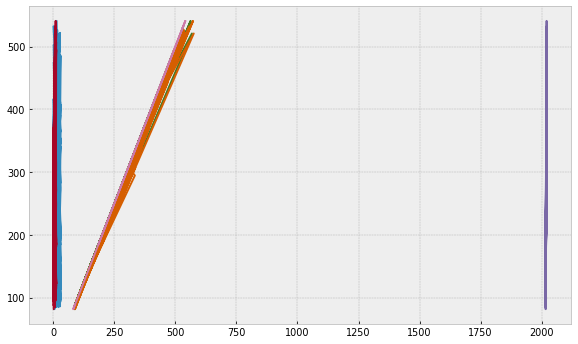

In [38]:
plt.figure(figsize=(10,6), dpi=70)
plt.plot(X_test, pred)
# plt.scatter(X_test, y_test)
plt.show()

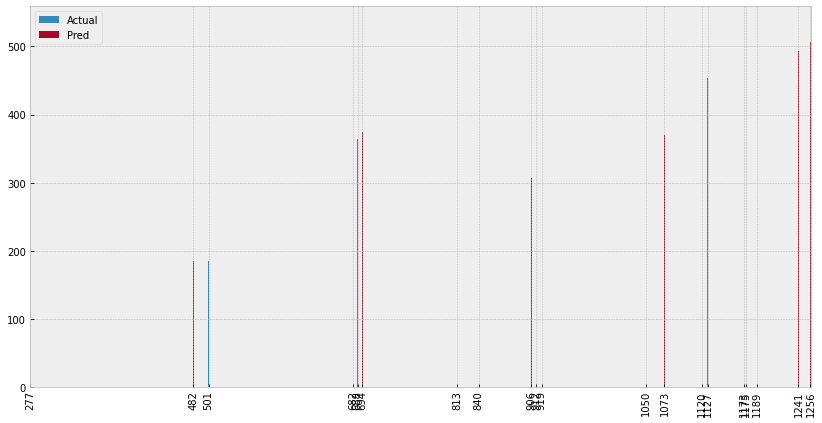

In [39]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':pred})
plot_df.head(20).plot(kind='bar',figsize=(14,7))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error , r2_score 
import math

lr_mse = math.sqrt(mean_squared_error(y_test, pred))
print('Linear Model RMSE: ', lr_mse)

Linear Model RMSE:  3.659604412387425e-14


## Manual method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def variable(n):
    n = np.random.randint(1, 15, size=(n, 2))
    x, y = [], []
    for i in range(0, len(n)):
        y.append(n[i, 0])

    for i in range(0, len(n)):
        x.append(n[i, 1])
    
    return x, y

def lin_reg(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    Ex, Ey = 0, 0
    for i in range(len(x)):
        Ex += (x[i]-x_mean)
        Ey += (y[i]-y_mean)

    b = Ex*Ey/Ex**2                   ## slope
    a = y_mean-(b*x_mean)             ## intercept
    yhat=[]                           ## yhat is the estimated value
    for i in range(len(x)):
        yhat.append(a + b*x[i])
        
    return yhat

In [ ]:
# del x_y_val
x_y_val = variable(15)
yhat = lin_reg(x_y_val[0], x_y_val[1])

In [ ]:
plt.scatter(x_y_val[0], x_y_val[1])
plt.plot(x_y_val[0], yhat,'-b')
plt.show()


## Boston House Price

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [68]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [20]:
sklinreg = LinearRegression(normalize=True)
sklinreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
pred = sklinreg.predict(X_test)

In [31]:
print("Train:", sklinreg.score(X_train, y_train))
print("Test:", sklinreg.score(X_test, y_test))

Train: 0.7320876164471337
Test: 0.7625517501841557


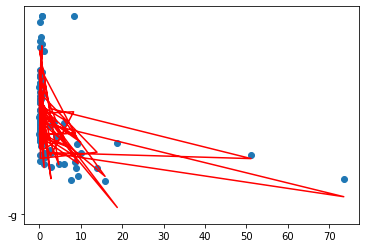

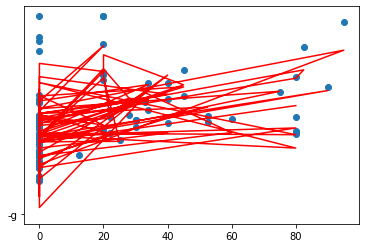

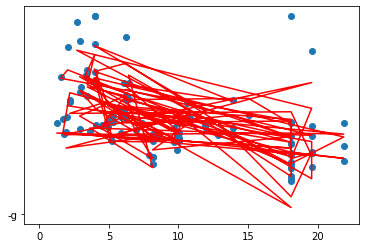

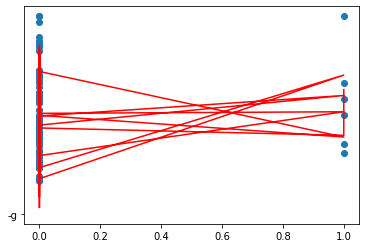

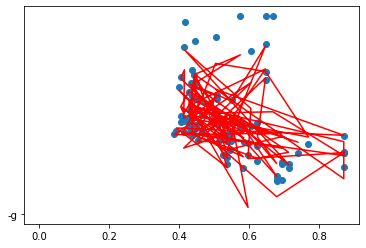

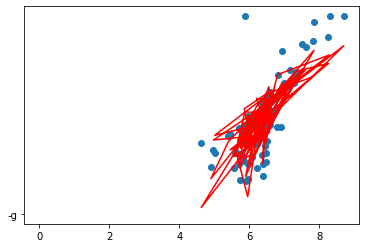

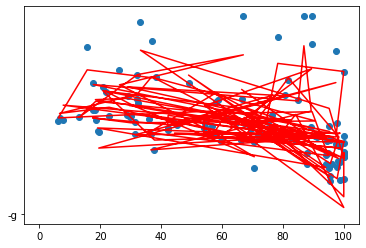

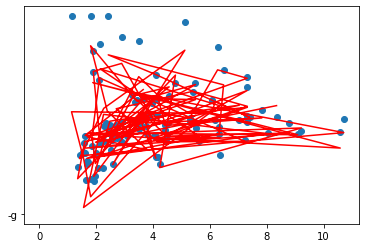

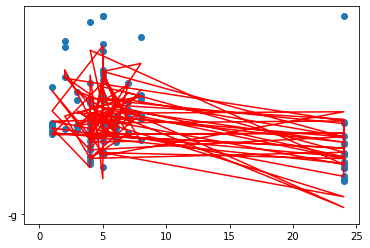

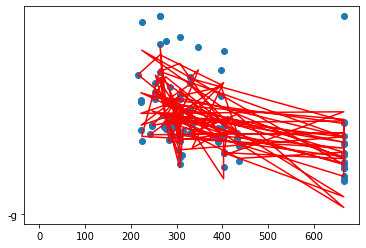

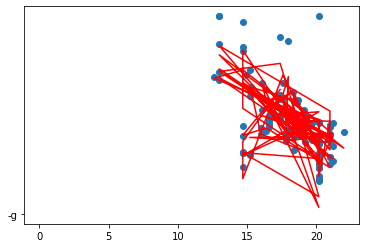

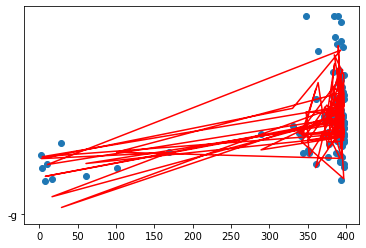

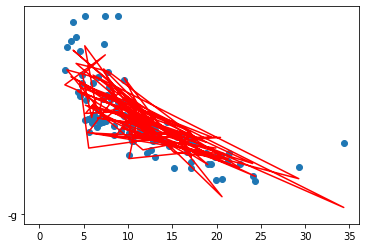

In [120]:
for i in range(len(X_test[0,:])):
    plt.plot(X_test[:,i], y_test, 'o', '-g')
    plt.plot(X_test[:,i].reshape(-1,1), pred, '-r')
#     plt.plot()
    plt.show()

In [47]:
eval('[sklinreg.intercept_, sklinreg.coef_]')

[37.4729786558095,
 array([-1.31550878e-01,  4.13396557e-02,  4.45014568e-02,  2.38941613e+00,
        -1.88042368e+01,  3.59972142e+00,  2.71230167e-03, -1.40084528e+00,
         3.35095926e-01, -1.31628184e-02, -9.59738984e-01,  1.07700389e-02,
        -5.20869898e-01])]